In [1]:
import json
import os
import pandas as pd

path_data = "../data/caselaw_data/"

main_attributes = json.load(open(path_data + "2301.json", "rb"))

data = {key: [] for key in main_attributes}

for case in os.listdir(path_data):
    file = json.load(open(path_data + case, "rb"))
    for attribute in data.keys():
        data[attribute].append(file[attribute])
    
df = pd.DataFrame(data)
df.head()

,title,court,courtEng,dateOfDocument,jurisdiction,keywords,summary,summaryEn,language,decisionType,...,nationalCaseLawRecords,caseHistory,ecthrCaseLawRecords,eurovoc,facilexOntology,nationalIdentifier,source,sourceUrl,text,classifiers
0,"VSRH, Kž eun 27/2017-4",Vrhovni sud Republike Hrvatske,The Supreme Court of the Republic of Croatia,2017-11-07T23:00:00Z,"{'label': 'Croatia', 'code': 'HR'}","[content and form of European Arrest Warrant, ...","<p class=""ql-align-justify"">Predmet se odnosi ...","<p class=""ql-align-justify""><span style=""color...","{'label': 'Croatian', 'code': 'HR'}","{'label': 'Other', 'code': 'Ruling'}",...,[],[],[],[],,Kž eun 27/2017-4,,https://sudskapraksa.csp.vsrh.hr/decisionPdf?i...,None,[Content of EAW]
1,"Rechtbank Amsterdam, 11-06-2020, ECLI:NL:RBAMS...",Rechtbank Amsterdam,Court of Amsterdam,2020-11-10T23:00:00Z,"{'label': 'Netherlands', 'code': 'NL'}","[FW Decision 2002/584 (EAW), assault]",None,"<p class=""ql-align-justify""><em>The case conce...","{'label': 'Dutch', 'code': 'NL'}","{'label': 'Judgment', 'code': 'J'}",...,[],[],[],[],,13/751267-20,,,,[Non-mandatory ground for refusal (double crim...
2,Wyrok Sądu Najwyższego z dnia 4 lipca 2013 r. ...,Sąd Najwyższy,Supreme Court,2013-07-03T22:00:00Z,"{'label': 'Poland', 'code': 'PL'}","[detention on remand, FW Decision 2002/584 (EAW)]",<p>Stosowanie tymczasowego aresztowania w toku...,<p>The application of detention on remand in t...,"{'label': 'Polish', 'code': 'PL'}","{'label': 'Judgment', 'code': 'J'}",...,[],[],[],[],,III KK 21/13,Supreme Court Database,http://www.sn.pl/orzecznictwo/SitePages/baza_o...,,[Detention conditions]
3,"Rechtbank Amsterdam, 14-09-2023, ECLI:NL:RBAMS...",Rechtbank Amsterdam,Court of Amsterdam,2023-09-13T22:00:00Z,"{'label': 'Netherlands', 'code': 'NL'}","[Regulation 2018/1805, crime unknown]",,"<p class=""ql-align-justify""><em>The case conce...","{'label': 'Dutch', 'code': 'NL'}","{'label': 'Judgment', 'code': 'J'}",...,"[{'title': 'Rechtbank Amsterdam, 02-05-2023, E...",[],[],[],,23/014471,rechtspraak.nl,https://uitspraken.rechtspraak.nl/#!/details?i...,,"[Freezing, Transmission of a freezing/confisca..."
4,Juzgado Central de Instrucción núm. 4. Auto 88...,Juzgado Central de Instrucción núm. 4,Central Examining Court n. 4,2023-07-06T22:00:00Z,"{'label': 'Spain', 'code': 'ES'}","[FW Decision 2002/584 (EAW), principle of mutu...",<p>El caso se refiere a los delitos de El caso...,<p>The case concerns the crimes of The case co...,"{'label': 'Spanish', 'code': 'ES'}","{'label': 'Order', 'code': 'O'}",...,[],[],[],[],,AAN 7411/2023,Centro de Documentación Judicial,https://www.poderjudicial.es/search/AN/openDoc...,,"[Double criminality, Non-mandatory ground for ..."


In [2]:
df = df[df["jurisdiction"].apply(lambda x: x["label"]) == "Italy"]

# eval similarity based on whether two articles share a common eu provision - upgrade to similar article/paragraphs

relevant_cols = ["title", "summary", "summaryEn", "euCaselaw", "euProvisions", "eurovoc"]
df = df[relevant_cols]
df = df[(df["euProvisions"].str.len() > 0)] #  | (df["eurovoc"].str.len() > 0)
df = df.reset_index(drop = True)
df.head()

,title,summary,summaryEn,euCaselaw,euProvisions,eurovoc
0,"Cass. Pen. sez. VI, 28/10/2022, no. 41102","<p><span style=""color: rgb(68, 68, 68);"">In te...",<p>The case is referred to the European arrest...,[],"[{'celex': '32002F0584', 'name': '2002/584/JHA...",[]
1,"Cass. Pen. sez F, 29/08/2023, n. 36397","<p><span style=""color: rgb(0, 0, 0);"">In tema ...",<p>The case concerns the crime of driving with...,[],"[{'celex': '32002F0584', 'name': '2002/584/JHA...",[]
2,"Cass. Pen. sez. fer., 27/08/2020, n. 24593","<p>L'art. 83, comma 12, L. n. 27 del 2020, pur...",<p>The case is referred to the European Arrest...,[],"[{'celex': '32002F0584', 'name': '2002/584/JHA...",[]
3,"Cassazione penale sez. VI, 30/10/2019, n. 49545",<p>L'omessa trasmissione della traduzione in l...,<p>Failure to provide an Italian-language tran...,[],"[{'celex': '32002F0584', 'name': '2002/584/JHA...",[]
4,"Cass. Pen. sez. VI, 15/09/2020, n.30885",<p>Meri vizi formali afferenti la comunicazion...,<p>The case concerns the offences of illigal t...,[],"[{'celex': '32014L0041', 'name': 'Directive 20...",[]


In [3]:
import re

# remove html elements
df["summaryEn"] = df["summaryEn"].apply(lambda x: re.sub(r"<.*?>", "", x))
df["summary"] = df["summary"].apply(lambda x: re.sub(r"<.*?>", "", x))
print(df.shape)
df.head()

(69, 6)


,title,summary,summaryEn,euCaselaw,euProvisions,eurovoc
0,"Cass. Pen. sez. VI, 28/10/2022, no. 41102","In tema di mandato di arresto europeo, è onere...",The case is referred to the European arrest wa...,[],"[{'celex': '32002F0584', 'name': '2002/584/JHA...",[]
1,"Cass. Pen. sez F, 29/08/2023, n. 36397","In tema di mandato di arresto europeo, l'udien...",The case concerns the crime of driving without...,[],"[{'celex': '32002F0584', 'name': '2002/584/JHA...",[]
2,"Cass. Pen. sez. fer., 27/08/2020, n. 24593","L'art. 83, comma 12, L. n. 27 del 2020, pur de...",The case is referred to the European Arrest Wa...,[],"[{'celex': '32002F0584', 'name': '2002/584/JHA...",[]
3,"Cassazione penale sez. VI, 30/10/2019, n. 49545",L'omessa trasmissione della traduzione in ling...,Failure to provide an Italian-language transla...,[],"[{'celex': '32002F0584', 'name': '2002/584/JHA...",[]
4,"Cass. Pen. sez. VI, 15/09/2020, n.30885",Meri vizi formali afferenti la comunicazione n...,The case concerns the offences of illigal traf...,[],"[{'celex': '32014L0041', 'name': 'Directive 20...",[]


In [4]:
df.iloc[0]["summaryEn"]

'The case is referred to the European arrest warrant and the relevant mandatory ground for refusal is the age of the person&nbsp;who is the subject of the European arrest warrant (article 3(3) of the EAW Framework Decision).In this regard, according to the Italian transposition law (Law 69 of 22 April 2005, article 18.1.c.), a European arrest warrant must be refused if the concerned person was under 14 years old at the time of commission of the crime. With regard to a minor who is older than 14 years old, the Italian court concluded that it is the duty of the defence that intends to oppose the surrender to provide for reliable, specific and up-to-date sources proving the existence of a concrete danger that the minor, during detention abroad, may be subjected to conditions incompatible with the guarantees of protection of the best interests of the child. This is based on the assumption that all member States own a separate detention system dedicated to minors.'

In [5]:
# from openai import OpenAI
# from env_utils import load_env_from_file

# load_env_from_file(".")

# client = OpenAI()

# def get_embedding(text, model="text-embedding-3-small"):
#    text = text.replace("\n", " ")
#    return client.embeddings.create(input = [text], model=model).data[0].embedding

# df['ada_embedding_orig'] = df["summary"].apply(lambda x: get_embedding(x, model='text-embedding-3-small'))
# df['ada_embedding_en'] = df["summaryEn"].apply(lambda x: get_embedding(x, model='text-embedding-3-small'))
# df.to_csv('embedded_summaries.csv', index=False)

In [6]:
from sklearn.utils import shuffle

print(f"Cases that mention Italy/Italian: {len(df[df['summaryEn'].apply(lambda x: 'Ital' in x) == True])}")
print(f"Cases that mention ground(s): {len(df[df['summaryEn'].apply(lambda x: 'ground' in x.lower()) == True])}")
print(f"Cases that mention concern(s): {len(df[df['summaryEn'].apply(lambda x: 'concerns' in x.lower() or 'concern' in x.split(' ') or 'relevant' in x.split(' ')) == True])}")
print(f"Cases with all: {len(df[(df['summaryEn'].apply(lambda x: 'Ital' in x) == True)  & (df['summaryEn'].apply(lambda x: 'ground' in x.lower()) == True) & (df['summaryEn'].apply(lambda x: 'concerns' in x.lower() or 'concern' in x.split(' ') or 'relevant' in x.split(' ')) == True)])}")

df_temp = df[(df['summaryEn'].apply(lambda x: 'Ital' in x) == True)  & (df['summaryEn'].apply(lambda x: 'ground' in x.lower()) == True) & (df['summaryEn'].apply(lambda x: 'concerns' in x.lower() or 'concern' in x.split(' ') or 'relevant' in x.split(' ')) == True)]
df_nontemp = df[~((df['summaryEn'].apply(lambda x: 'Ital' in x) == True)  & (df['summaryEn'].apply(lambda x: 'ground' in x.lower()) == True) & (df['summaryEn'].apply(lambda x: 'concerns' in x.lower() or 'concern' in x.split(' ') or 'relevant' in x.split(' ')) == True))]

print(df_temp.shape, df_nontemp.shape)

df_nontemp = shuffle(df_nontemp, random_state = 42)

groups_non_temp = [df_nontemp.iloc[idx:idx + len(df_temp)] for idx in range(0,len(df_nontemp), len(df_temp))]

print(df_temp.shape, df_nontemp.shape)

Cases that mention Italy/Italian: 33
Cases that mention ground(s): 20
Cases that mention concern(s): 25
Cases with all: 14
(14, 6) (55, 6)
(14, 6) (55, 6)


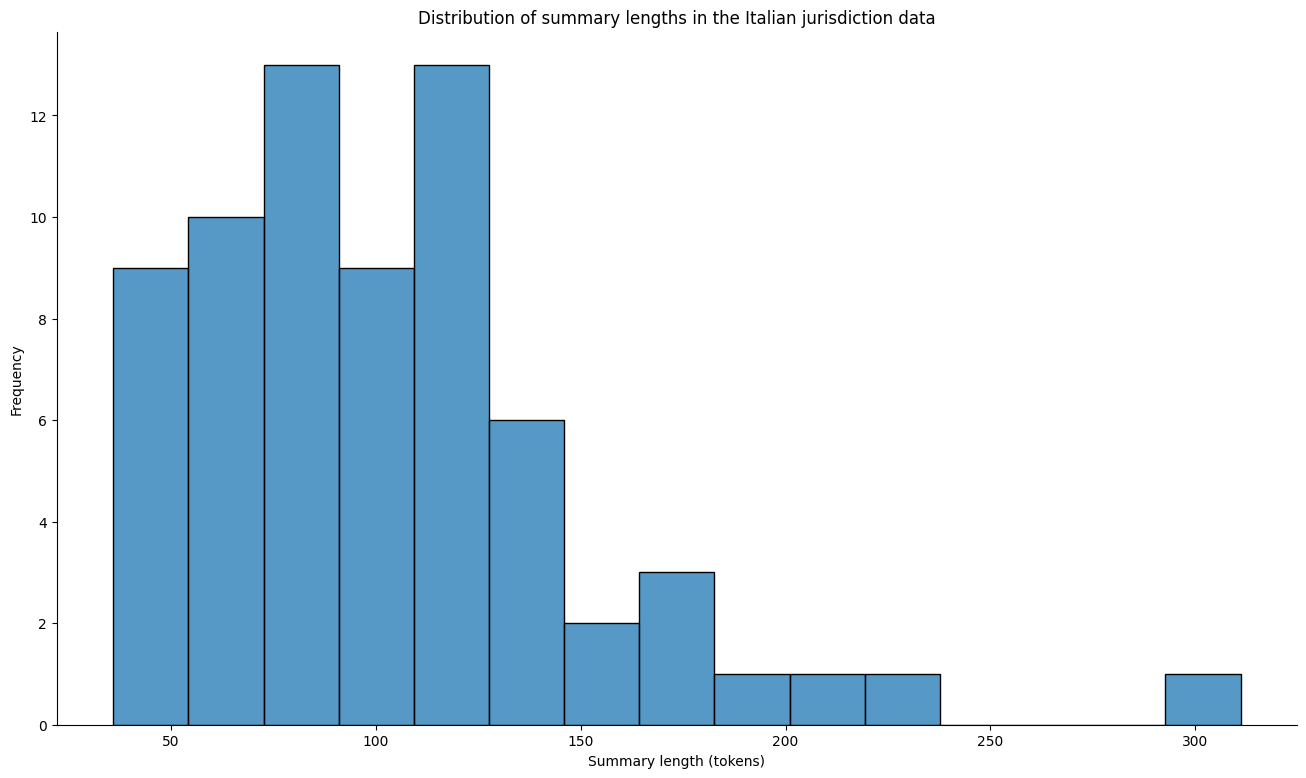

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (16,9))
sns.histplot(df["summary"].str.split(" ").apply(lambda x: len(x)), bins = 15)
sns.despine()
plt.xlabel("Summary length (tokens)")
plt.ylabel("Frequency")
plt.title("Distribution of summary lengths in the Italian jurisdiction data")
plt.savefig("summary_length_IT.png", transparent = False)
plt.show()

In [8]:
import numpy as np

data_less150 = df[df["summary"].str.split(" ").apply(lambda x: len(x)) < np.median(df["summary"].str.split(" ").apply(lambda x: len(x)))]
data_more150 = df[df["summary"].str.split(" ").apply(lambda x: len(x)) >= np.median(df["summary"].str.split(" ").apply(lambda x: len(x)))]

print(np.median(df["summary"].str.split(" ").apply(lambda x: len(x))))

96.0


In [9]:
print(data_less150.shape, data_more150.shape)

(34, 6) (35, 6)


In [10]:
import numpy as np
import torch

from sentence_transformers import SentenceTransformer

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


$P=\frac{relevant\ retrieved\ docs}{total\ retrieved\ docs}$

$R=\frac{relevant\ retrieved\ docs}{total\ retrieved\ docs\ in\ dataset}$

$MRR=\frac{1}{|Q|}\sum_q^Q \frac{1}{rank_q}$ where

$MRR^*=\frac{1}{|Q|}\sum_q^Q \frac{1}{rank_q + missed}$ where

$rank_q = 0$ if there are no relevant documents in the retrieved search window\
where $missed$ is the number of relevant documents missed in the retrieved search window equal to at most the number non-relevant retrieved documents

$DCG=\sum_{i=1}^p\frac{rel_i}{log_2(i+1)}$


In [23]:
from sklearn.metrics.pairwise import cosine_similarity

# at least one shared EU provision ==> similar
# at least one shared EuroVoc ==> similar
# eval - score each of the 5 retrieved cases for shared celex codes (only one celex now)

def cosine_search(query, search, query_type, top_k = 5):
    cosine_scores = cosine_similarity(query, search)
    score_doc = []

    denesting_label = ""
    if query_type == "euProvisions":
        denesting_label = "celex"
    elif query_type == "eurovoc":
        denesting_label = "label"

    running_mrr = 0
    running_mrr_normal = 0
    metrics = {}

    for i in range(cosine_scores.shape[0]):
        all_matches = np.argsort(cosine_scores[i])[::-1]
        best_matches = all_matches[1:top_k+1]
        query_celex = df.iloc[i][query_type][0][denesting_label]

        # see which top_k retrieved documents were retrieved
        score = []
        for retrieved_case in best_matches:
            retrieved_celex = [provision[denesting_label] for provision in df.iloc[retrieved_case][query_type]]
            score.append(int(query_celex in retrieved_celex))

        ### find all relevant cases that were missed
        missed_matches = []
        # for retrieved_case in all_matches[1:len(df_temp)]:
        for retrieved_case in all_matches[1:]:
            retrieved_celex = [provision[denesting_label] for provision in df.iloc[retrieved_case][query_type]]
            missed_matches.append(int(query_celex in retrieved_celex))

        score = np.asarray(score)
        no_missed_matches = np.sum(missed_matches) if np.sum(missed_matches) > 0 else 1
        score_doc.append([np.sum(score)/top_k, np.sum(score)/no_missed_matches])
        rank = np.where(score != 0)[0] # get first non-zero rank
        rank = (rank[0] + 1) if len(rank) > 0 else 0
        missed = np.min([len(np.where(score == 0)[0]), np.sum(missed_matches)])
        running_mrr += 1/(rank + missed) if rank != 0 else 0 # rank starts at 0 bcs. of this so rank + 1
        running_mrr_normal += 1/(rank) if rank != 0 else 0 # rank starts at 0 bcs. of this so rank + 1
        print(f"Query score: {score}, rank of 1st relevant case: {rank}, mrr_w_penalty: {running_mrr:0.3f}, mrr: {running_mrr_normal:0.3f}, number of cases still missing in the query {missed}, total missed: {np.sum(missed_matches)}")
        
    # macro precision@k and recall@k
    precision, recall = np.mean(score_doc, 0)
    f1 = 2 * precision * recall / (precision + recall)

    metrics["precision"] = precision
    metrics["recall"] = recall
    metrics["f1"] = f1
    metrics["mrr_miss"] = running_mrr/cosine_scores.shape[0]
    metrics["mrr"] = running_mrr_normal/cosine_scores.shape[0]
    
    return metrics

Query score: [1 1 1 1 1], rank of 1st relevant case: 1, mrr_w_penalty: 57.779, mrr: 62.833, number of cases still missing in the query 0, total missed: 10

Query score: [1 0 0 0 0], rank of 1st relevant case: 1, mrr_w_penalty: 58.029, mrr: 63.833, number of cases still missing in the query 3, total missed: 3

In [24]:
# optimal_top_k = 25 (debatable) 

from collections import defaultdict
from functools import partial
from tqdm import tqdm

models = ["paraphrase-multilingual-mpnet-base-v2"]
# search_functions = [partial(cosine_search, query_type = "euProvisions"), partial(cosine_search, query_type = "eurovoc"), cosine_search_both]
search_functions = [partial(cosine_search, query_type = "euProvisions")]

scores_search_function = defaultdict()

sl, tl = "EN", "IT"

d = df

for search_func in tqdm(search_functions):
    scores = {"Model": [], "Pair": [], "Value": [], "Score": []}

    for model_name in models:

        if "openai" not in model_name:
            model = SentenceTransformer("../models/" + model_name).to(device)
            data_pairs = [
                (f"{sl}-{sl}", np.asarray(d["summaryEn"].apply(model.encode).tolist()), np.asarray(d["summaryEn"].apply(model.encode).tolist())),
                (f"{tl}-{tl}", np.asarray(d["summary"].apply(model.encode).tolist()), np.asarray(d["summary"].apply(model.encode).tolist())),
                (f"{sl}-{tl}", np.asarray(d["summaryEn"].apply(model.encode).tolist()), np.asarray(d["summary"].apply(model.encode).tolist())),
                (f"{tl}-{sl}", np.asarray(d["summary"].apply(model.encode).tolist()), np.asarray(d["summaryEn"].apply(model.encode).tolist()))
            ]
        else:
            data_pairs = [
                (f"{sl}-{sl}", np.asarray(d["ada_embedding_en"].tolist()), np.asarray(d["ada_embedding_en"].tolist())),
                (f"{tl}-{tl}", np.asarray(d["ada_embedding_orig"].tolist()), np.asarray(d["ada_embedding_orig"].tolist())),
                (f"{sl}-{tl}", np.asarray(d["ada_embedding_en"].tolist()), np.asarray(d["ada_embedding_orig"].tolist())),
                (f"{tl}-{sl}", np.asarray(d["ada_embedding_orig"].tolist()), np.asarray(d["ada_embedding_en"].tolist()))
            ]

        for (pair, query, search) in data_pairs:
            metrics = search_func(query = query, search = search, top_k = 5)

            scores["Model"] += [model_name] * len(list(metrics.keys()))
            scores["Pair"] += [pair] * len(list(metrics.keys()))
            scores["Value"] += list(metrics.values())
            scores["Score"] += list(metrics.keys())

    name = ""
    if type(search_func) == partial:
        name = search_func.func.__name__ + "_" + "_".join(list(search_func.keywords.values()))
    else:
        name = search_func.__name__
    scores_search_function[name] = scores


  0%|          | 0/1 [00:00<?, ?it/s]

Query score: [1 1 1 1 1], rank of 1st relevant case: 1, mrr_w_penalty: 1.000, mrr: 1.000, number of cases still missing in the query 0, total missed: 53
Query score: [1 1 1 1 1], rank of 1st relevant case: 1, mrr_w_penalty: 2.000, mrr: 2.000, number of cases still missing in the query 0, total missed: 53
Query score: [1 1 1 1 1], rank of 1st relevant case: 1, mrr_w_penalty: 3.000, mrr: 3.000, number of cases still missing in the query 0, total missed: 53
Query score: [1 1 1 1 1], rank of 1st relevant case: 1, mrr_w_penalty: 4.000, mrr: 4.000, number of cases still missing in the query 0, total missed: 53
Query score: [1 1 1 0 0], rank of 1st relevant case: 1, mrr_w_penalty: 4.333, mrr: 5.000, number of cases still missing in the query 2, total missed: 10
Query score: [1 1 1 1 1], rank of 1st relevant case: 1, mrr_w_penalty: 5.333, mrr: 6.000, number of cases still missing in the query 0, total missed: 53
Query score: [1 1 1 1 1], rank of 1st relevant case: 1, mrr_w_penalty: 6.333, mrr:

100%|██████████| 1/1 [00:07<00:00,  7.91s/it]

Query score: [1 1 1 1 1], rank of 1st relevant case: 1, mrr_w_penalty: 1.000, mrr: 1.000, number of cases still missing in the query 0, total missed: 53
Query score: [1 1 1 1 1], rank of 1st relevant case: 1, mrr_w_penalty: 2.000, mrr: 2.000, number of cases still missing in the query 0, total missed: 53
Query score: [1 1 1 1 1], rank of 1st relevant case: 1, mrr_w_penalty: 3.000, mrr: 3.000, number of cases still missing in the query 0, total missed: 53
Query score: [1 1 1 1 1], rank of 1st relevant case: 1, mrr_w_penalty: 4.000, mrr: 4.000, number of cases still missing in the query 0, total missed: 53
Query score: [1 1 1 0 0], rank of 1st relevant case: 1, mrr_w_penalty: 4.333, mrr: 5.000, number of cases still missing in the query 2, total missed: 11
Query score: [1 1 1 1 1], rank of 1st relevant case: 1, mrr_w_penalty: 5.333, mrr: 6.000, number of cases still missing in the query 0, total missed: 53
Query score: [1 1 1 1 1], rank of 1st relevant case: 1, mrr_w_penalty: 6.333, mrr:

<Figure size 1600x900 with 0 Axes>

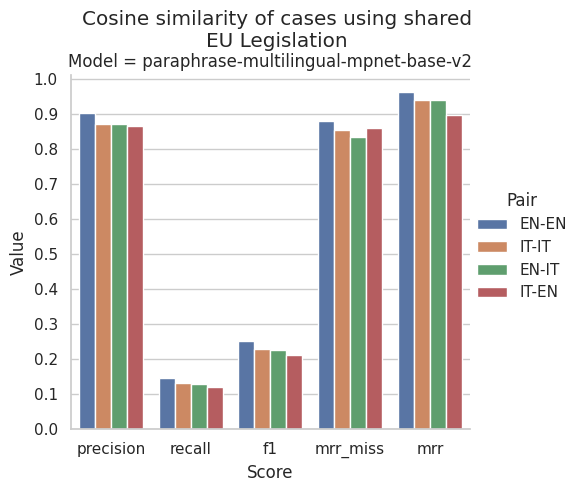

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MultipleLocator

figure_title_names = {
    "cosine_search_euProvisions": "Cosine similarity of cases using shared\nEU Legislation",
    "cosine_search_eurovoc": "Cosine similarity of cases using shared\nEuroVoc Labels",
    "cosine_search_both": "Cosine similarity of cases using both shared\nEU Legislation and EuroVoc Labels"
}

plt.figure(figsize = (16,9))
sns.set_theme(style = "whitegrid")
for func_name, score_func in scores_search_function.items():
    scores_df = pd.DataFrame(score_func)
    # scores_df = scores_df[scores_df["Model"] == "paraphrase-multilingual-mpnet-base-v2"]

    fig = sns.catplot(kind = "bar", data = scores_df, x = "Score", y = "Value", hue = "Pair", col = "Model")
    fig.figure.subplots_adjust(top=0.85)
    fig.figure.suptitle(figure_title_names[func_name])

    for ax in fig.axes.flat:
        ax.yaxis.set_major_locator(MultipleLocator(0.1))

    plt.savefig(f"{func_name}.png", transparent = False)
    plt.show()

In [15]:
import numpy as np

from sklearn.metrics.pairwise import cosine_similarity

# at least one shared EU provision ==> similar
# at least one shared EuroVoc ==> similar
# eval - score each of the 5 retrieved cases for shared celex codes (only one celex now)

def cosine_search_both(query, search, top_k):
    cosine_scores = cosine_similarity(query, search)
    score_doc = []

    for i in range(cosine_scores.shape[0]):
        all_matches = np.argsort(cosine_scores[i])[::-1]
        best_matches = all_matches[1:top_k+1]

        query_celex = df.iloc[i]["euProvisions"][0]["celex"]
        query_eurovec = df.iloc[i]["eurovoc"][0]["label"]

        # see which top_k retrieved documents were retrieved
        score = []
        for retrieved_case in best_matches:
            retrieved_celex = [provision["celex"] for provision in df.iloc[retrieved_case]["euProvisions"]]
            retrieved_eurovec = [provision["label"] for provision in df.iloc[retrieved_case]["eurovoc"]]
            score.append(int(query_celex in retrieved_celex or query_eurovec in retrieved_eurovec))

        ### find all relevant cases that were missed
        missed_matches = []
        for retrieved_case in all_matches[1:]:
            retrieved_celex = [provision["celex"] for provision in df.iloc[retrieved_case]["euProvisions"]]
            retrieved_eurovec = [provision["label"] for provision in df.iloc[retrieved_case]["eurovoc"]]
            missed_matches.append(int(query_celex in retrieved_celex or query_eurovec in retrieved_eurovec))
        
        no_missed_matches = np.sum(missed_matches) if np.sum(missed_matches) > 0 else 1
        score_doc.append([np.sum(score)/top_k, np.sum(score)/no_missed_matches])
        
    # macro precision and recall
    precision, recall = np.mean(score_doc, 0)
    f1 = 2 * precision * recall / (precision + recall)

    return precision, recall, f1

Further refinement: check the retrieved documents, and if they are not relevant continue searching until a relevant case is found, up until top_k documents have been found

In [16]:
# arr_sc = []
# mean_sc = []
# for sc in s:
#     arr_sc.append(sc["cosine_search_euProvisions"]["Value"])


# arr_sc = np.asarray(arr_sc)
# for idx in range(arr_sc.shape[1]):
#     mean_sc.append(np.mean(arr_sc[:, idx]))

# scores = {"Model": [], "Pair": [], "Value": [], "Score": []}
# mean_sc
# sc_new = {"Model": s[0]["cosine_search_euProvisions"]["Model"], "Pair": s[0]["cosine_search_euProvisions"]["Pair"], "Value": mean_sc, "Score": s[0]["cosine_search_euProvisions"]["Score"]}
# # sc_new = {"func_name": {"cosine_search_euProvisions": sc_new}}

# sc_new

In [17]:
# # optimal_top_k = 25 (debatable) 

# from collections import defaultdict
# from functools import partial
# from tqdm import tqdm

# models = ["distiluse-base-multilingual-cased-v2", "paraphrase-multilingual-mpnet-base-v2"]
# # search_functions = [partial(cosine_search, query_type = "euProvisions"), partial(cosine_search, query_type = "eurovoc"), cosine_search_both]
# search_functions = [partial(cosine_search, query_type = "euProvisions")]

# used_data = "non_temp"
# metrics = ["Precision", "Recall", "F1", "MRR"]

# sl, tl = "EN", "IT"

# s = []

# for group in groups_non_temp:
#     scores_search_function = defaultdict()
#     for search_func in tqdm(search_functions):
#         scores = {"Model": [], "Pair": [], "Value": [], "Score": []}

#         for model_name in models:
#             model = SentenceTransformer("models/" + model_name).to(device)

#             data_pairs = [
#                 (f"{sl}-{sl}", np.asarray(group["summaryEn"].apply(model.encode).tolist()), np.asarray(group["summaryEn"].apply(model.encode).tolist())),
#                 (f"{tl}-{tl}", np.asarray(group["summary"].apply(model.encode).tolist()), np.asarray(group["summary"].apply(model.encode).tolist())),
#                 (f"{sl}-{tl}", np.asarray(group["summaryEn"].apply(model.encode).tolist()), np.asarray(group["summary"].apply(model.encode).tolist())),
#                 (f"{tl}-{sl}", np.asarray(group["summary"].apply(model.encode).tolist()), np.asarray(group["summaryEn"].apply(model.encode).tolist()))
#             ]

#             for (pair, query, search) in data_pairs:
#                 precision, recall, f1, mrr = search_func(query = query, search = search, top_k = 5)

#                 scores["Model"] += [model_name] * len(metrics)
#                 scores["Pair"] += [pair] * len(metrics)
#                 scores["Value"] += [precision, recall, f1]
#                 scores["Score"] += [metrics]

#         name = ""
#         if type(search_func) == partial:
#             name = search_func.func.__name__ + "_" + "_".join(list(search_func.keywords.values()))
#         else:
#             name = search_func.__name__
#         scores_search_function[name] = scores

#     s.append(scores_search_function)


In [18]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# figure_title_names = {
#     "cosine_search_euProvisions": "Cosine similarity of cases using shared\nEU Legislation",
#     "cosine_search_eurovoc": "Cosine similarity of cases using shared\nEuroVoc Labels",
#     "cosine_search_both": "Cosine similarity of cases using both shared\nEU Legislation and EuroVoc Labels"
# }

# plt.figure(figsize = (16,9))
# sns.set_theme(style = "whitegrid")
# scores_df = pd.DataFrame(sc_new)
# print(scores_df)
# # scores_df = scores_df[scores_df["Model"] == "paraphrase-multilingual-mpnet-base-v2"]

# fig = sns.catplot(kind = "bar", data = scores_df, x = "Score", y = "Value", hue = "Pair", col = "Model")
# fig.figure.subplots_adjust(top=0.85)
# fig.figure.suptitle("cosine_search_euProvisions")

# plt.savefig(f"cosine_search_euProvisions_{used_data}.png", transparent = False)
# plt.show()